In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
dir_path = "/Users/lxp/Kaggle_data/Titanic/"

train = pd.read_csv("%s%s" % (dir_path,'train.csv'))
test = pd.read_csv("%s%s" % (dir_path,'test.csv'))

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 特征说明
|特征|描述|值|
|-:|-:|-:|
|Survived|生存|0表示No 1表示Yes|  
|Pclass|票的类别，社会地位|1=1st 2=2nd 3=3th|
|sex|性别|male=男，female=女|
|Age|年龄|
|sibsp|兄弟姐妹或者配偶|
|parch|父母/孩子的数量|
|ticket|票号|
|fare|乘客票价|
|cabin|客舱号码|
|embarked|登船港口|C=Cherbourg,Q=Queenstown,S=Southampton|

In [4]:
# 返回每列名，该列非nan值的个数，以及该列类型
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
# 返回数值变量的统计量
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 特征分析
初步了解数据之间的相关性，为构特征工程做准备

In [7]:
# 存活人数
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### 特征分析——数值型数据相关性

In [8]:
# 数据值数据协方差 corr() 函数
# 相关性协方差表，corr() 函数，返回结果接近0说明无相关性，大于0说明是正相关，小于0说明是负相关
train_corr = train.drop('PassengerId',axis=1).corr()  # 首先把第一列去掉，再进行corr
train_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


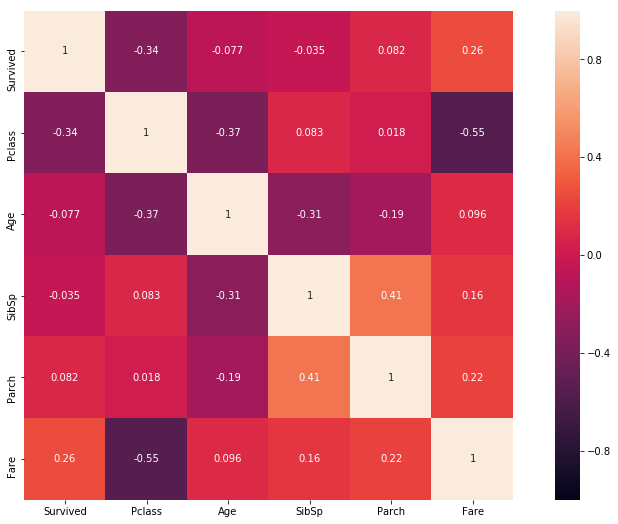

In [10]:
# 画出相关性热力图
a = plt.subplots(figsize=(15,9)) # 调整画布大小
a = sns.heatmap(train_corr, vmin=-1,vmax=1, annot=True, square=True) 

### 特征分析——各个数据与结果之间的关系

* Pclass 
结果分析：可以看出Survived和Pclass=1的时候有较强的相关性(>0.5)，所以最终模型的结果包含该特征。

In [11]:
train.groupby(['Pclass'])['Pclass','Survived'].mean()

,Pclass,Survived
Pclass,,
1,1.0,0.629630
2,2.0,0.472826
3,3.0,0.242363


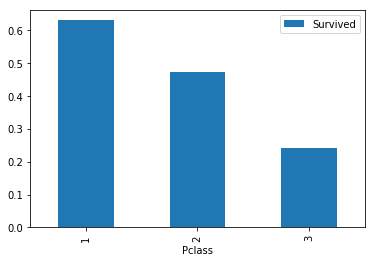

In [13]:
# 可以画出图像
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

* Sex性别
结果分析：女性有更高的活下去的概率，应该保留该特征。

In [15]:
train.groupby(['Sex'])['Sex','Survived'].mean()

,Survived
Sex,
female,0.742038
male,0.188908


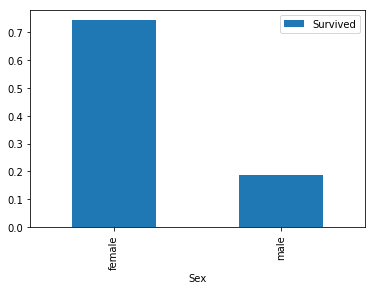

In [16]:
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

* SibSp and Parch 兄妹配偶数/父母子女数  
结果分析:这些特征与特定的值没有相关性不明显，最好是由这些独立的特征派生出一个新特征或者一组新特征

In [17]:
train[['SibSp','Survived']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


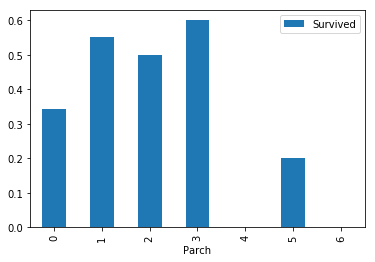

In [18]:
train[['Parch','Survived']].groupby(['Parch']).mean().plot.bar()

* Age年龄与生存情况的分析  

    结果分析:由图,可以看到年龄是影响生存情况的.

    但是年龄是有大部分缺失值的,缺失值需要进行处理,可以使用填充或者模型预测.

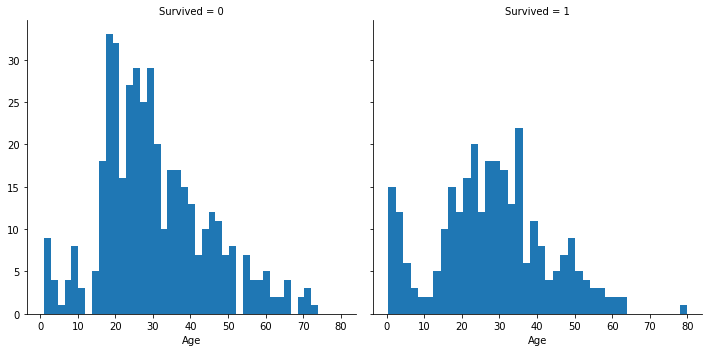

In [19]:
g = sns.FacetGrid(train, col='Survived',size=5)
g.map(plt.hist, 'Age', bins=40)

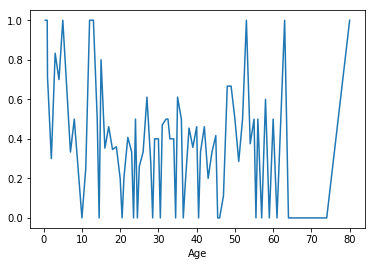

In [20]:
train.groupby(['Age'])['Survived'].mean().plot()

*  Embarked登港港口与生存情况的分析  

    结果分析:C地的生存率更高,这个也应该保留为模型特征.

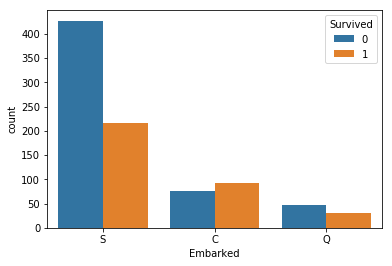

In [22]:
sns.countplot('Embarked',hue='Survived',data=train)

* 其他因素  

在数据的Name项中包含了对该乘客的称呼，如Mr、Miss等，这些信息包含了乘客的年龄、性别、也有可能包含社会地位，如Dr、Lady、Major、Master等称呼。这一项不方便用图表展示，但是在特征工程中，我们会将其提取出来,然后放到模型中。

剩余因素还有船票价格、船舱号和船票号，这三个因素都可能会影响乘客在船中的位置从而影响逃生顺序，但是因为这三个因素与生存之间看不出明显规律，所以在后期模型融合时，将这些因素交给模型来决定其重要性。


## 特征工程

In [23]:
# 先将数据集进行合并，一起做特征工程（这里需要注意的是，标准化的时候需要分开进行处理）
# 先将test进行补齐，用 append将两个数据集进行合并
test['Survived'] = 0
train_test = train.append(test)

### 特征处理

* Pclass,乘客等级,1是最高级

两种方式:一是该特征不做处理,可以直接保留.二是再处理:也进行分列处理(比较那种方式模型效果更好,就选那种)

分列处理，即 one hot 处理方式

In [24]:
train_test = pd.get_dummies(train_test,columns=['Pclass'])

* Sex,性别 无缺失值,直接分列

In [26]:
train_test = pd.get_dummies(train_test,columns=["Sex"])

* SibSp and Parch 兄妹配偶数/父母子女数

第一次直接保留:这两个都影响生存率,且都是数值型,先直接保存.

第二次进行两项求和,并进行分列处理.(兄妹配偶数和父母子女数都是认识人的数量,所以总数可能也会更好)(模型结果提高到了)  通过模型发现的

In [27]:
#这是建好模型后回来添加的新特征,模型的分数最终有所提高了.
train_test['SibSp_Parch'] = train_test['SibSp'] + train_test['Parch']

In [28]:
train_test = pd.get_dummies(train_test,columns = ['SibSp','Parch','SibSp_Parch']) 

*  Embarked 

数据有极少量(3个)缺失值,但是在分列的时候,缺失值的所有列可以均为0,所以可以考虑不填充。   
另外,也可以考虑用测试集众数来填充.先找出众数,再采用df.fillna()方法

In [29]:
train_test = pd.get_dummies(train_test,columns=["Embarked"])

* Name

在数据的Name项中包含了对该乘客的称呼,将这些关键词提取出来,然后做分列处理。(参考别人的)

In [30]:
#从名字中提取出称呼： df['Name].str.extract()是提取函数,配合正则一起使用
train_test['Name1'] = train_test['Name'].str.extract('.+,(.+)', expand=False).str.extract('^(.+?)\.', expand=False).str.strip()

In [31]:
#将姓名分类处理()
train_test['Name1'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer' , inplace = True)
train_test['Name1'].replace(['Jonkheer', 'Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty' , inplace = True)
train_test['Name1'].replace(['Mme', 'Ms', 'Mrs'], 'Mrs')
train_test['Name1'].replace(['Mlle', 'Miss'], 'Miss')
train_test['Name1'].replace(['Mr'], 'Mr' , inplace = True)
train_test['Name1'].replace(['Master'], 'Master' , inplace = True)

In [32]:
#分列处理
train_test = pd.get_dummies(train_test,columns=['Name1'])

从姓名中提取出姓做特征

In [33]:
#从姓名中提取出姓
train_test['Name2'] = train_test['Name'].apply(lambda x: x.split('.')[1])

#计算数量,然后合并数据集
Name2_sum = train_test['Name2'].value_counts().reset_index()
Name2_sum.columns=['Name2','Name2_sum']
train_test = pd.merge(train_test,Name2_sum,how='left',on='Name2')

#由于出现一次时该特征时无效特征,用one来代替出现一次的姓
train_test.loc[train_test['Name2_sum'] == 1 , 'Name2_new'] = 'one'
train_test.loc[train_test['Name2_sum'] > 1 , 'Name2_new'] = train_test['Name2']
del train_test['Name2']

#分列处理
train_test = pd.get_dummies(train_test,columns=['Name2_new'])

In [34]:
#删掉姓名这个特征
del train_test['Name']

* Fare

该特征有缺失值,先找出缺失值的那调数据,然后用平均数填充

In [35]:
#从上面的分析,发现该特征train集无miss值,test有一个缺失值,先查看
train_test.loc[train_test["Fare"].isnull()]

,Age,Cabin,Fare,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Name2_new_ Thomas Henry,Name2_new_ Victor,Name2_new_ Washington,Name2_new_ William,Name2_new_ William Edward,Name2_new_ William Henry,Name2_new_ William James,Name2_new_ William John,Name2_new_ William Thomas,Name2_new_one
1043,60.5,NaN,NaN,1044,0,3701,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#票价与pclass和Embarked有关,所以用train分组后的平均数填充
train.groupby(by=["Pclass","Embarked"]).Fare.mean()

Pclass  Embarked
1       C           104.718529
        Q            90.000000
        S            70.364862
2       C            25.358335
        Q            12.350000
        S            20.327439
3       C            11.214083
        Q            11.183393
        S            14.644083
Name: Fare, dtype: float64

In [37]:
#用pclass=3和Embarked=S的平均数14.644083来填充
train_test["Fare"].fillna(14.435422,inplace=True)

* Ticket  
该列和名字做类似的处理,先提取,然后分列

In [38]:
#将Ticket提取字符列
#str.isnumeric()  如果S中只有数字字符，则返回True，否则返回False
train_test['Ticket_Letter'] = train_test['Ticket'].str.split().str[0]
train_test['Ticket_Letter'] = train_test['Ticket_Letter'].apply(lambda x:np.nan if x.isnumeric() else x)
train_test.drop('Ticket',inplace=True,axis=1)

In [39]:
#分列,此时nan值可以不做处理
train_test = pd.get_dummies(train_test,columns=['Ticket_Letter'],drop_first=True)

* Age  

   该列有大量缺失值,考虑用一个回归模型进行填充.  
   在模型修改的时候,考虑到年龄缺失值可能影响死亡情况,用年龄是否缺失值来构造新特征

In [40]:
train_test.loc[train_test["Age"].isnull()]['Survived'].mean()

0.19771863117870722

In [41]:
# 这是模型就好后回来增加的新特征考虑年龄缺失值可能影响死亡情况,数据表明,年龄缺失的死亡率为0.19.
# 所以用年龄是否缺失值来构造新特征
train_test.loc[train_test["Age"].isnull() ,"age_nan"] = 1
train_test.loc[train_test["Age"].notnull() ,"age_nan"] = 0
train_test = pd.get_dummies(train_test,columns=['age_nan'])

利用其他组特征量，采用机器学习算法来预测Age

In [ ]:
#创建没有['Age','Survived']的数据集
missing_age = train_test.drop(['Survived','Cabin'],axis=1)
#将Age完整的项作为训练集、将Age缺失的项作为测试集。
missing_age_train = missing_age[missing_age['Age'].notnull()]
missing_age_test = missing_age[missing_age['Age'].isnull()]


#构建训练集合预测集的X和Y值
missing_age_X_train = missing_age_train.drop(['Age'], axis=1)
missing_age_Y_train = missing_age_train['Age']
missing_age_X_test = missing_age_test.drop(['Age'], axis=1)

# 先将数据标准化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
#用测试集训练并标准化
ss.fit(missing_age_X_train)
missing_age_X_train = ss.transform(missing_age_X_train)
missing_age_X_test = ss.transform(missing_age_X_test)

#使用贝叶斯预测年龄
from sklearn import linear_model
lin = linear_model.BayesianRidge()

lin.fit(missing_age_X_train,missing_age_Y_train)
#利用loc将预测值填入数据集
train_test.loc[(train_test['Age'].isnull()), 'Age'] = lin.predict(missing_age_X_test)

#将年龄划分是个阶段10以下,10-18,18-30,30-50,50以上
train_test['Age'] = pd.cut(train_test['Age'], bins=[0,10,18,30,50,100],labels=[1,2,3,4,5])

train_test = pd.get_dummies(train_test,columns=['Age'])


* Cabin  
cabin项缺失太多，只能将有无Cain首字母进行分类,缺失值为一类,作为特征值进行建模,也可以考虑直接舍去该特征

In [47]:
#cabin项缺失太多，只能将有无Cain首字母进行分类,缺失值为一类,作为特征值进行建模
train_test['Cabin_nan'] = train_test['Cabin'].apply(lambda x:str(x)[0] if pd.notnull(x) else x)
train_test = pd.get_dummies(train_test,columns=['Cabin_nan'])

#cabin项缺失太多，只能将有无Cain首字母进行分类,
train_test.loc[train_test["Cabin"].isnull() ,"Cabin_nan"] = 1
train_test.loc[train_test["Cabin"].notnull() ,"Cabin_nan"] = 0
train_test = pd.get_dummies(train_test,columns=['Cabin_nan'])
train_test.drop('Cabin',axis=1,inplace=True)

特征工程处理完了,划分数据集

In [48]:
train_data = train_test[:891]
test_data = train_test[891:]
train_data_X = train_data.drop(['Survived'],axis=1)
train_data_Y = train_data['Survived']
test_data_X = test_data.drop(['Survived'],axis=1)

1. 线性模型需要用标准化的数据建模,而树类模型不需要标准化的数据  
2. 处理标准化的时候,注意将测试集的数据transform到test集上

In [49]:
from sklearn.preprocessing import StandardScaler
ss2 = StandardScaler()
ss2.fit(train_data_X)
train_data_X_sd = ss2.transform(train_data_X)
test_data_X_sd = ss2.transform(test_data_X)

## 建立模型

### 随机森林

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150,min_samples_leaf=3,max_depth=6,oob_score=True)
rf.fit(train_data_X,train_data_Y)

test["Survived"] = rf.predict(test_data_X)
RF = test[['PassengerId','Survived']].set_index('PassengerId')
RF.to_csv('RF.csv')

## LogisticRegression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV

lr = LogisticRegression()
param = {'C':[0.001,0.01,0.1,1,10], "max_iter":[100,250]}
clf = GridSearchCV(lr, param,cv=5, n_jobs=-1, verbose=1, scoring="roc_auc")
clf.fit(train_data_X_sd, train_data_Y)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'max_iter': [100, 250]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=1)

In [54]:
clf.best_params_   # 找到最佳参数

{'C': 0.01, 'max_iter': 100}

In [55]:
clf.grid_scores_

[mean: 0.85604, std: 0.02703, params: {'C': 0.001, 'max_iter': 100},
 mean: 0.85604, std: 0.02703, params: {'C': 0.001, 'max_iter': 250},
 mean: 0.86908, std: 0.02995, params: {'C': 0.01, 'max_iter': 100},
 mean: 0.86908, std: 0.02995, params: {'C': 0.01, 'max_iter': 250},
 mean: 0.86265, std: 0.03436, params: {'C': 0.1, 'max_iter': 100},
 mean: 0.86265, std: 0.03436, params: {'C': 0.1, 'max_iter': 250},
 mean: 0.85417, std: 0.03749, params: {'C': 1, 'max_iter': 100},
 mean: 0.85417, std: 0.03749, params: {'C': 1, 'max_iter': 250},
 mean: 0.84738, std: 0.03913, params: {'C': 10, 'max_iter': 100},
 mean: 0.84738, std: 0.03913, params: {'C': 10, 'max_iter': 250}]

In [ ]:
# 将最佳参数传入训练模型
lr = LogisticRegression(clf.best_params_)
lr.fit(train_data_X_sd, train_data_Y)

# 输出结果
test["Survived"] = lr.predict(test_data_X_sd)
test[['PassengerId', 'Survived']].set_index('PassengerId').to_csv('LS5.csv')

### SVM

In [59]:
from sklearn import svm
svc = svm.SVC()

clf = GridSearchCV(svc,param,cv=5,n_jobs=-1,verbose=1,scoring="roc_auc")
clf.fit(train_data_X_sd,train_data_Y)

clf.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-p

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-p

{'C': 1, 'max_iter': 250}

In [60]:
svc = svm.SVC(C=1,max_iter=250)

In [61]:
# 训练模型并预测结果
svc.fit(train_data_X_sd,train_data_Y)
svc.predict(test_data_X_sd)

# 打印结果
test["Survived"] = svc.predict(test_data_X_sd)
SVM = test[['PassengerId','Survived']].set_index('PassengerId')
SVM.to_csv('svm1.csv')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


### GBDT

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier(learning_rate=0.7,max_depth=6,n_estimators=100,min_samples_leaf=2)

gbdt.fit(train_data_X,train_data_Y)

test["Survived"] = gbdt.predict(test_data_X)
test[['PassengerId','Survived']].set_index('PassengerId').to_csv('gbdt3.csv')

### xgboost

In [63]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=150,min_samples_leaf=3,max_depth=6)
xgb_model.fit(train_data_X,train_data_Y)

test["Survived"] = xgb_model.predict(test_data_X)
XGB = test[['PassengerId','Survived']].set_index('PassengerId')
XGB.to_csv('XGB5.csv')

## 建立融合

In [64]:
#voting
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.1,max_iter=100)

import xgboost as xgb
xgb_model = xgb.XGBClassifier(max_depth=6,min_samples_leaf=2,n_estimators=100,num_round = 5)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,min_samples_leaf=2,max_depth=6,oob_score=True)

from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(learning_rate=0.1,min_samples_leaf=2,max_depth=6,n_estimators=100)

vot = VotingClassifier(estimators=[('lr', lr), ('rf', rf),('gbdt',gbdt),('xgb',xgb_model)], voting='hard')
vot.fit(train_data_X_sd,train_data_Y)

test["Survived"] = vot.predict(test_data_X_sd)
test[['PassengerId','Survived']].set_index('PassengerId').to_csv('vot5.csv')

In [66]:
# stacking
# 划分train数据集,调用代码,把数据集名字转成和代码一样
X = train_data_X_sd
X_predict = test_data_X_sd
y = train_data_Y

'''模型融合中使用到的各个单模型'''
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

clfs = [LogisticRegression(C=0.1,max_iter=100),
        xgb.XGBClassifier(max_depth=6,n_estimators=100,num_round = 5),
        RandomForestClassifier(n_estimators=100,max_depth=6,oob_score=True),
        GradientBoostingClassifier(learning_rate=0.3,max_depth=6,n_estimators=100)]

# 创建n_folds
from sklearn.cross_validation import StratifiedKFold
n_folds = 5
skf = list(StratifiedKFold(y, n_folds))

# 创建零矩阵
dataset_blend_train = np.zeros((X.shape[0], len(clfs)))
dataset_blend_test = np.zeros((X_predict.shape[0], len(clfs)))

# 建立模型
for j, clf in enumerate(clfs):
    '''依次训练各个单模型'''
    # print(j, clf)
    dataset_blend_test_j = np.zeros((X_predict.shape[0], len(skf)))
    for i, (train, test) in enumerate(skf):
        '''使用第i个部分作为预测，剩余的部分来训练模型，获得其预测的输出作为第i部分的新特征。'''
        # print("Fold", i)
        X_train, y_train, X_test, y_test = X[train], y[train], X[test], y[test]
        clf.fit(X_train, y_train)
        y_submission = clf.predict_proba(X_test)[:, 1]
        dataset_blend_train[test, j] = y_submission
        dataset_blend_test_j[:, i] = clf.predict_proba(X_predict)[:, 1]
    '''对于测试集，直接用这k个模型的预测值均值作为新的特征。'''
    dataset_blend_test[:, j] = dataset_blend_test_j.mean(1)

# 用建立第二层模型
clf2 = LogisticRegression(C=0.1,max_iter=100)
clf2.fit(dataset_blend_train, y)
y_submission = clf2.predict_proba(dataset_blend_test)[:, 1]

test = pd.read_csv("/Users/lxp/Kaggle_data/Titanic/test.csv")
test["Survived"] = clf2.predict(dataset_blend_test)
test[['PassengerId','Survived']].set_index('PassengerId').to_csv('stack3.csv')